In [2]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
import nltk
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read Data
redsData = pd.read_csv('wine-quality/wineQualityReds.csv')
whitesData = pd.read_csv('wine-quality/wineQualityWhites.csv')

In [3]:
# View Sample Data
print ('\n Reds \n')
print (redsData.head())


 Reds 

   Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0           1            7.4              0.70         0.00             1.9   
1           2            7.8              0.88         0.00             2.6   
2           3            7.8              0.76         0.04             2.3   
3           4           11.2              0.28         0.56             1.9   
4           5            7.4              0.70         0.00             1.9   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1    

In [4]:
# Look at differences in residual sugar
# print ('\n Reds residual sugar \n')
# print (redsData['residual.sugar'].describe())
# redSugar = plt.figure()
# plt.hist(redsData['residual.sugar'], bins = 50, color='red')
# redSugar.show()

# print ('\n Whites residual sugar \n')
# print (whitesData['residual.sugar'].describe())
# whiteSugar = plt.figure()
# plt.hist(whitesData['residual.sugar'], bins = 50)
# whiteSugar.show()

In [5]:
# Look at differences in ratings
# print ('\n Reds Quality \n')
# print (redsData['quality'].describe())
# redSugar = plt.figure()
# plt.hist(redsData['quality'], bins = 6, color='red')
# redSugar.show()

# print ('\n Whites Quality \n')
# print (whitesData['quality'].describe())
# whiteSugar = plt.figure()
# plt.hist(whitesData['quality'], bins = 7)
# whiteSugar.show()

In [6]:
# Normalize Data
X = redsData.iloc[:,1:-1]
y = redsData.iloc[:,-1]
X_norm = (X - X.mean()) / (X.max() - X.min())
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)
# print(X.shape)
# print (X_train.shape)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
neighbors.fit(X_train, y_train) 
neighbors.score(X_test, y_test)

0.6060606060606061

In [8]:
U, S, V_tran = svds(X_train.T, k=1)
V = V_tran.T
print (U.shape)
print (V.shape)
print (y_train.shape)
X_test_svd = X_test.dot(U)
print (X_test_svd.shape)

(11, 1)
(1071, 1)
(1071,)
(528, 1)


In [9]:
neighbors = KNeighborsClassifier(n_neighbors=99)
neighbors.fit(V, y_train) 
neighbors.score(X_test_svd, y_test)

0.4053030303030303

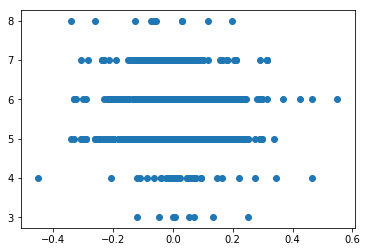

In [10]:
plt.scatter(X_train['pH'] ,y_train)
plt.show()

In [12]:
forest = RandomForestClassifier(max_depth=10, max_features=11, criterion='gini', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
forest.score(X_test, y_test)

0.6496212121212122

In [14]:
print(forest.n_features_)

11


In [15]:
print(forest.feature_importances_)

[0.04647497 0.10646208 0.05978915 0.06802077 0.09165052 0.04441014
 0.09610392 0.06513655 0.06598543 0.12737373 0.22859274]


In [16]:
def simplifyClassificationTertiary(row):
    if row['quality'] == 7 or row['quality'] == 8 :
        return 1
    elif row['quality'] == 5 or row['quality'] == 6:
        return 0
    else:
        return -1
    
def simplifyClassificationBinary(row):
    if row['quality'] == 6 or row['quality'] == 7 or row['quality'] == 8 :
        return 1
    else:
        return -1

redsData.rename(columns={'Unnamed: 0': 'class'}, inplace=True)
redsData['class'] = redsData.apply (lambda row: simplifyClassificationBinary(row),axis=1)

In [17]:
# print(redsData.head())
print ((np.sum(redsData['class'] == 1)) / 1599)

0.5347091932457786


In [18]:
X = redsData.iloc[:,1:-1]
y = redsData.iloc[:,0]
X_norm = (X - X.mean()) / (X.max() - X.min())
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

In [19]:
neighbors = KNeighborsClassifier(n_neighbors=1)
neighbors.fit(X_train, y_train) 
neighbors.score(X_test, y_test)

0.7367424242424242

In [20]:
forest = RandomForestClassifier(max_depth=100, max_features=2, criterion='gini', random_state=0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7878787878787878

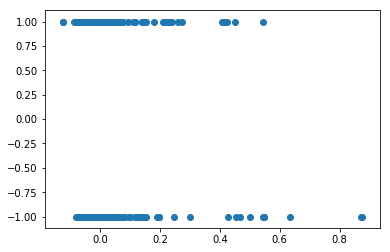

In [21]:
plt.scatter(X_train['chlorides'] ,y_train)
plt.show()

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [27]:
logistic = LogisticRegression(penalty='l2')
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
logistic.score(X_test, y_test)

0.7196969696969697

In [46]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, class_weight=None, warm_start=False, average=False, n_iter=None)

In [50]:
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

/Users/jatinbharwani/venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7367424242424242

In [52]:
sgd.predict_proba(X_test)

array([[0.75160504, 0.24839496],
       [0.89490218, 0.10509782],
       [0.33283587, 0.66716413],
       ...,
       [0.02695879, 0.97304121],
       [0.94023836, 0.05976164],
       [0.83884883, 0.16115117]])

In [53]:
from sklearn.metrics import log_loss

In [55]:
log_loss(y_test, forest.predict(X_test))

7.326478290358363

In [4]:
import json
df = pd.read_json('wine-reviews/winemag-data-130k-v2.json')

In [11]:
print (df.shape)
df.head()

(129971, 13)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [48]:
df = df[np.isfinite(df['price'])]
print (df.shape)
df = df[np.isfinite(df['points'])]
print (df.shape)

(120975, 13)
(120975, 13)


In [73]:
print(df['price'].iloc[319])

350.0


In [71]:
# Find argmax and argmin indices
print(np.argmax(df['points'].values))

319


In [58]:
print(max_row)

74674
